In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import expm_multiply
from PIL import Image
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import colorsys

In [7]:
image = Image.open('images/schrodinger.jpeg').convert('L')
psi0_image = np.array(image, dtype=np.float64) / 255.0 
nx, ny = psi0_image.shape
print(f"Grid size: {nx} x {ny}")

Grid size: 1080 x 782


/tmp/ipykernel_386630/4138304520.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  psi0_image = np.array(image, dtype=np.float64) / 255.0


In [58]:
psi0 = psi0_image.ravel()
psi0 = psi0 / np.linalg.norm(psi0)

In [9]:
# Build Hamiltonian
diag_x = np.ones([nx])
diags_x = np.array([diag_x, -2*diag_x, diag_x])
D_x = sparse.spdiags(diags_x, [-1, 0, 1], nx, nx)

diag_y = np.ones([ny])
diags_y = np.array([diag_y, -2*diag_y, diag_y])
D_y = sparse.spdiags(diags_y, [-1, 0, 1], ny, ny)

T = -1/2 * sparse.kronsum(D_x, D_y)
V = np.zeros(nx * ny)
U = sparse.diags(V, 0)
H = T + U

In [ ]:
num_steps = 30
dt = 0.02

In [93]:
psi = psi0
psi_t = []
for i in range(num_steps):
    psi = expm_multiply(-1j * H * dt, psi)
    psi_t.append(psi)

In [94]:
psi_images = [np.absolute(psi.reshape(nx, ny))**2 for psi in psi_t]

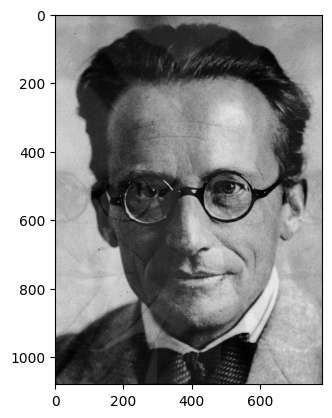

In [95]:
plt.imshow(psi_images[29], cmap='grey')

# color

In [35]:
psi_t_flat_all = expm_multiply(-1j * H, psi0_flat, start=t_start, stop=t_end, num=num_steps, endpoint=True)

def psi_to_rgb(psi):
    intensity = np.abs(psi)**2  # |psi(t)|^2
    phase = np.angle(psi)  # Phase in [-π, π]
    
    # HSL components
    hue = (phase + np.pi) / (2 * np.pi)  # Map phase to [0, 1]
    saturation = np.ones_like(hue)  # Full saturation by default
    saturation[np.abs(phase) < 1e-6] = 0  # Set saturation to 0 for phase = 0 (grayscale)
    
    # Lightness mapped by intensity
    max_intensity = np.max(intensity)
    lightness = np.clip(intensity / max_intensity, 0, 1) if max_intensity > 0 else intensity
    
    # Use vectorized operations for HSL to RGB conversion
    rgb = np.zeros(hue.shape + (3,))  # Initialize RGB array
    
    # Apply HLS to RGB conversion for the entire array
    for i in range(3):  # Apply conversion to R, G, B channels separately
        rgb[..., i] = np.vectorize(lambda h, l, s: colorsys.hls_to_rgb(h, l, s)[i])(hue, lightness, saturation)
    
    return rgb

# Prepare animation data
psi_t_rgb_list = []
for i, psi_t_flat in enumerate(psi_t_flat_all):
    psi_t = psi_t_flat.reshape(nx, ny)
    rgb_frame = psi_to_rgb(psi_t)
    psi_t_rgb_list.append(rgb_frame) 

t = 0.000, Norm = 1.000000, Phase range = (np.float64(0.0), np.float64(0.0)), Intensity range = (np.float64(0.0), np.float64(2.795794647151399e-06))
